In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Average Toxicity Scores over Year Months

In [20]:
df = pd.read_csv('../data/combined_data_scores.csv')

In [22]:
monthly_agg = df.groupby('yearmonth').agg({
    'hatebert_toxicity_score': ['mean', 'std', 'count'],
    'hateXplain_toxicity_score': ['mean', 'std'],
    'toxicbert_toxicity_score': ['mean', 'std'],
    'average_toxicity_score': ['mean', 'std']
}).reset_index()

In [23]:
# Flatten column names
monthly_agg.columns = ['_'.join(col).strip('_') for col in monthly_agg.columns.values]

In [24]:
# Rename columns for clarity
monthly_agg = monthly_agg.rename(columns={
    'hatebert_toxicity_score_count': 'post_count'
})

In [25]:
# Display the results
print("\nPreprocessed dataset shape:", monthly_agg.shape)
print("\nColumns in preprocessed data:", monthly_agg.columns.tolist())
monthly_agg.head()


Preprocessed dataset shape: (46, 10)

Columns in preprocessed data: ['yearmonth', 'hatebert_toxicity_score_mean', 'hatebert_toxicity_score_std', 'post_count', 'hateXplain_toxicity_score_mean', 'hateXplain_toxicity_score_std', 'toxicbert_toxicity_score_mean', 'toxicbert_toxicity_score_std', 'average_toxicity_score_mean', 'average_toxicity_score_std']


,yearmonth,hatebert_toxicity_score_mean,hatebert_toxicity_score_std,post_count,hateXplain_toxicity_score_mean,hateXplain_toxicity_score_std,toxicbert_toxicity_score_mean,toxicbert_toxicity_score_std,average_toxicity_score_mean,average_toxicity_score_std
0,2020-01,0.064483,0.099303,74240,0.067799,0.100363,0.042783,0.033425,0.058355,0.052193
1,2020-02,0.063876,0.097027,83617,0.066380,0.097516,0.044662,0.033611,0.058306,0.051102
2,2020-03,0.064724,0.098804,94863,0.066061,0.096543,0.045630,0.033612,0.058805,0.050800
3,2020-04,0.066814,0.100887,121318,0.064658,0.095361,0.045772,0.033727,0.059081,0.051018
4,2020-05,0.065622,0.098629,99602,0.065117,0.096247,0.046404,0.033676,0.059048,0.050602


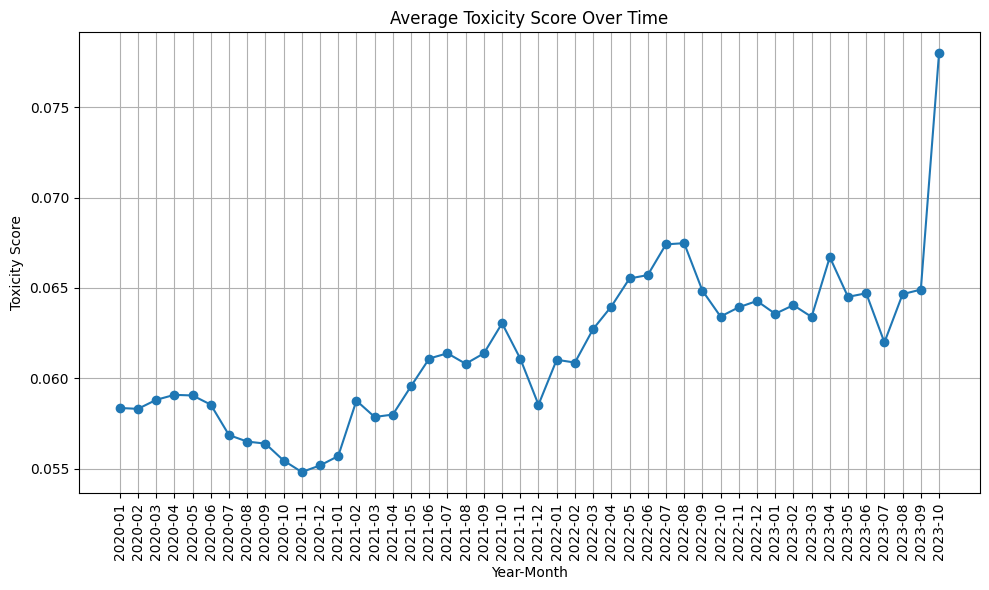

In [26]:
# Plotting
plt.figure(figsize=(10,6))
plt.plot(monthly_agg['yearmonth'], monthly_agg['average_toxicity_score_mean'], marker='o', linestyle='-')
plt.title('Average Toxicity Score Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Toxicity Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# Basic statistics of the preprocessed data
monthly_agg.describe()

,hatebert_toxicity_score_mean,hatebert_toxicity_score_std,post_count,hateXplain_toxicity_score_mean,hateXplain_toxicity_score_std,toxicbert_toxicity_score_mean,toxicbert_toxicity_score_std,average_toxicity_score_mean,average_toxicity_score_std
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,0.069898,0.107349,97920.195652,0.072708,0.108238,0.042098,0.033297,0.061568,0.056675
std,0.006619,0.012420,26131.935099,0.008103,0.013173,0.002294,0.000285,0.004270,0.007326
min,0.058961,0.086576,25919.000000,0.063477,0.091256,0.033472,0.032050,0.054809,0.045729
25%,0.064543,0.098672,82099.000000,0.066423,0.097482,0.040787,0.033140,0.058535,0.050950
50%,0.070141,0.107654,95323.500000,0.071281,0.106391,0.041907,0.033323,0.061235,0.056436
75%,0.074192,0.116090,109540.500000,0.077302,0.116948,0.043757,0.033491,0.064220,0.061609
max,0.093986,0.150195,185309.000000,0.106509,0.155725,0.046404,0.033727,0.077989,0.082865


In [ ]:
monthly_agg.to_csv('../data/monthly_scores_summary.csv', index=False)

# Topic Visualisation

In [3]:
topics_2023 = pd.read_csv('../data/topics_2023.csv')
# Filter out outlier topic
oct_2023 = topics_2023[(topics_2023['yearmonth'] == '2023-10') & (topics_2023['Topic'] != -1)]

In [30]:
oct_2023.head()

,text,yearmonth,title,index,average_toxicity_score,Topic,Count,Name,Representation,Representative_Docs
771800,80 times the risk for ED.,2023-10,2 cups of local kopi a day may reduce parkinsons,4478410,0.035469,137,24,137_stds_std_condoms_condom,"['stds', 'std', 'condoms', 'condom', 'sex', 'p...",['Latter spreading stds among atb.\n\nLky spre...
771802,My terrapin has the whole bathroom for himself...,2023-10,terrapin spooked by detonation of 100kg wwii bomb,4478412,0.046128,11,230,11_tables_wipe_wiping_table,"['tables', 'wipe', 'wiping', 'table', 'wipes',...","['""If you dirty the table, then you need to wi..."
771803,singaporeans so desperate after rampant inflat...,2023-10,singaporean mother daughter arrested for,4478413,0.090532,0,2271,0_gaza_palestinians_hamas_palestinian,"['gaza', 'palestinians', 'hamas', 'palestinian...","[""Hey maybe if they stopped wanting to kill ev..."
771805,Because they are kum gong kias who think they'...,2023-10,38 year old pmet see no future in sgplanning to,4478415,0.220245,0,2271,0_gaza_palestinians_hamas_palestinian,"['gaza', 'palestinians', 'hamas', 'palestinian...","[""Hey maybe if they stopped wanting to kill ev..."
771807,I don't want to comment on the kid ... he's to...,2023-10,mother 39 fights with woman 33 in chai chee over,4478417,0.077624,11,230,11_tables_wipe_wiping_table,"['tables', 'wipe', 'wiping', 'table', 'wipes',...","['""If you dirty the table, then you need to wi..."


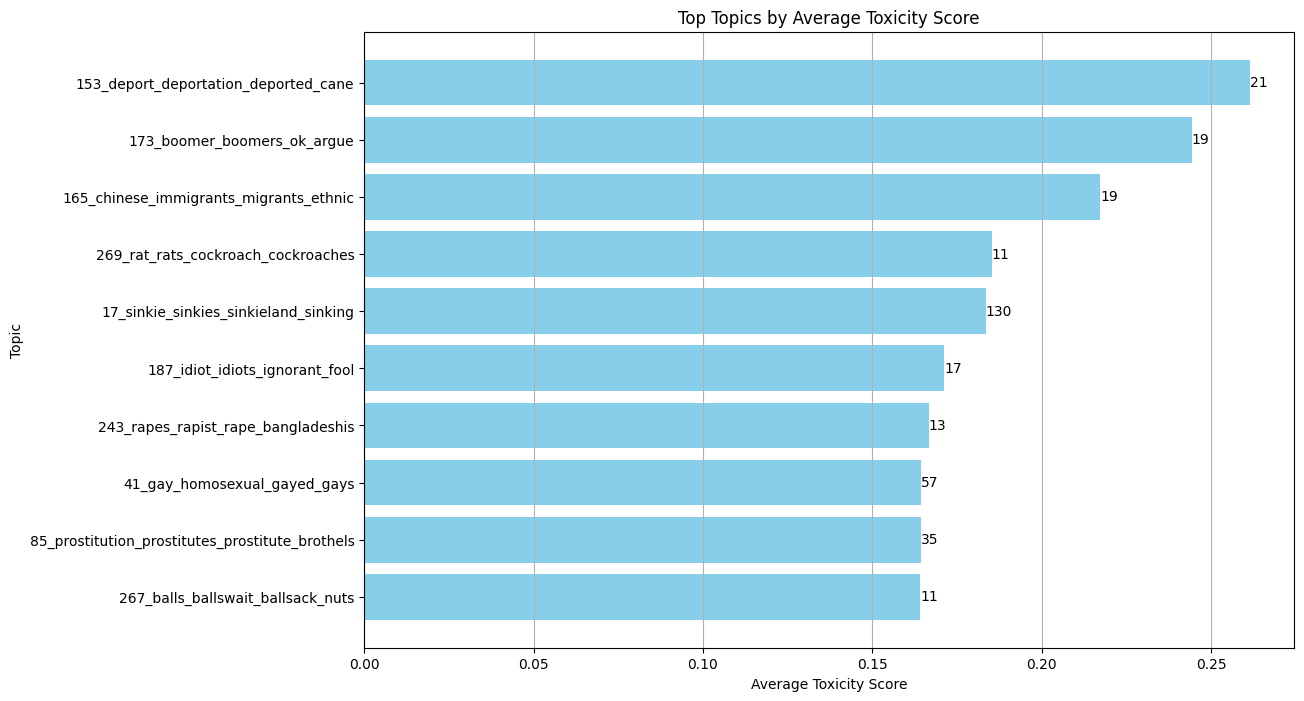

In [29]:
# Group by 'Topic' and calculate the mean toxicity score
topic_toxicity = oct_2023.groupby('Name').agg({'average_toxicity_score': 'mean', 'Count': 'max'}).reset_index()

# Sort by average toxicity score in descending order and select the top topics
top_topics = topic_toxicity.sort_values(by='average_toxicity_score', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_topics['Name'], top_topics['average_toxicity_score'], color='skyblue')
plt.title('Top Topics by Average Toxicity Score')
plt.ylabel('Topic')
plt.xlabel('Average Toxicity Score')

# Add count as bar label
for index, value in enumerate(top_topics['average_toxicity_score']):
    plt.text(value, index, str(top_topics['Count'].iloc[index]), ha='left', va='center')
plt.gca().invert_yaxis()
plt.grid(axis='x')
#plt.tight_layout()
plt.show()

In [7]:
# Filter for Topic 153
topic_153_comments = oct_2023[oct_2023['Topic'] == 153]

# Sort by toxicity score in descending order
sorted_comments = topic_153_comments.sort_values(by='average_toxicity_score', ascending=False)

# Display the comments
sorted_comments.drop(columns=['yearmonth', 'index', 'Count']).head(10)

,text,title,average_toxicity_score,Topic,Name,Representation,Representative_Docs
795419,Deport this bug sandwich eater! Why cover face...,so violent sia this man,0.595665,153,153_deport_deportation_deported_cane,"['deport', 'deportation', 'deported', 'cane', ...","['Do you mean deport?', 'Deport!', 'Deport?']"
786030,Should just fucking deport this trash back aft...,china uncle blasted han fei zi the influencer who,0.588409,153,153_deport_deportation_deported_cane,"['deport', 'deportation', 'deported', 'cane', ...","['Do you mean deport?', 'Deport!', 'Deport?']"
795854,Cane and deport all Tiongs now!,just saying,0.426402,153,153_deport_deportation_deported_cane,"['deport', 'deportation', 'deported', 'cane', ...","['Do you mean deport?', 'Deport!', 'Deport?']"
790084,Cane and deport all Tiongs now!,malware scam,0.426402,153,153_deport_deportation_deported_cane,"['deport', 'deportation', 'deported', 'cane', ...","['Do you mean deport?', 'Deport!', 'Deport?']"
788602,Cane and deport all Tiongs now!,prc working in sg looking down on fellow,0.426402,153,153_deport_deportation_deported_cane,"['deport', 'deportation', 'deported', 'cane', ...","['Do you mean deport?', 'Deport!', 'Deport?']"
789035,Cane and deport all Tiongs now!,14 trillion lost to scams globally spore victims,0.426402,153,153_deport_deportation_deported_cane,"['deport', 'deportation', 'deported', 'cane', ...","['Do you mean deport?', 'Deport!', 'Deport?']"
783394,Don't just say .. deport them,ong ye kung response to viral video at sgh,0.415722,153,153_deport_deportation_deported_cane,"['deport', 'deportation', 'deported', 'cane', ...","['Do you mean deport?', 'Deport!', 'Deport?']"
783752,Faster deport 👏🥱,pretty girl but no substance,0.333880,153,153_deport_deportation_deported_cane,"['deport', 'deportation', 'deported', 'cane', ...","['Do you mean deport?', 'Deport!', 'Deport?']"
786932,Revoke PR n deport,do you think this ceca kia is telling the truth,0.316148,153,153_deport_deportation_deported_cane,"['deport', 'deportation', 'deported', 'cane', ...","['Do you mean deport?', 'Deport!', 'Deport?']"
786851,Obviously not…he knew what he was doing. SMH d...,do you think this ceca kia is telling the truth,0.307833,153,153_deport_deportation_deported_cane,"['deport', 'deportation', 'deported', 'cane', ...","['Do you mean deport?', 'Deport!', 'Deport?']"
